# Part I: Data Loading and Pre-processing:

(Q1) Download one of the datasets listed above from the course blackboard page, and import
it into either your Python environment or MATLAB.

In [ ]:
import pandas as pd
df = pd.read_csv("heightWeightData.csv",header=None)
print(f"{df.head()}\n") #DataFrame.head(n=5) Return the first n rows.      '\n' (line feed)
#The f or F in front of strings tell Python to look at the values
#expressions or instance inside {} and substitute them with the variables values or results if exists.

   0   1    2
0  1  67  125
1  2  68  140
2  2  67  142
3  2  60  110
4  2  64   97



In [ ]:
print(f"{df.info()}\n") # The info() method provides useful information about the DataFrame
#such as the number of non-null values, data type of each column, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       210 non-null    int64
 1   1       210 non-null    int64
 2   2       210 non-null    int64
dtypes: int64(3)
memory usage: 5.0 KB
None



In [ ]:
print(f"{df.isnull().sum()}\n") # The isnull() is used to check for missing or null values in a pandas DataFrame object.

0    0
1    0
2    0
dtype: int64



In [ ]:
for column in df:
    print(f"{df[column].describe()}\n")
#describe() is a method used to generate descriptive statistics of a pandas DataFrame object.
#The method provides various summary statistics
#including measures of central tendency, dispersion, and shape of the distribution

count    210.000000
mean       1.652381
std        0.477352
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: 0, dtype: float64

count    210.000000
mean      67.361905
std        4.458471
min       55.000000
25%       64.000000
50%       67.000000
75%       71.000000
max       79.000000
Name: 1, dtype: float64

count    210.000000
mean     145.657143
std       32.694857
min       95.000000
25%      125.000000
50%      140.000000
75%      161.500000
max      280.000000
Name: 2, dtype: float64



(Q2) Now we will pre-process the data! This will eliminate the missing values which are
unsuitable for our machine learning algorithms. The following commands you may
find useful for this task:

In [ ]:
# pandas.DataFrame.drop() is a method used to remove one or more rows or columns from a pandas DataFrame object
#The drop() method can take several arguments, including:

#labels: the row or column labels to be removed.
     #This can be a single label (if removing a single row or column) or a list of labels (if removing multiple rows or columns).
#axis: the axis along which to remove the rows or columns.
     #By default, axis=0 (i.e., rows are removed), but you can also use axis=1 to remove columns.
#index: an alternative way to specify the row labels to be removed (equivalent to labels when axis=0).
#columns: an alternative way to specify the column labels to be removed (equivalent to labels when axis=1).

import pandas as pd

# create a sample DataFrame
data = {'Name': ['John', 'Mary', 'Tom', 'Jane'],
        'Age': [25, 30, 21, 27],
        'Height': [180, 165, 175, 170]}
df = pd.DataFrame(data)

# drop a single row
df.drop(1, inplace=True)
print(f"{df}\n")

# drop multiple rows
df.drop([0, 2], inplace=True)
print(f"{df}\n")

# drop a single column
df.drop('Height', axis=1, inplace=True)
print(f"{df}\n")

# drop multiple columns
df.drop(['Name', 'Age'], axis=1, inplace=True)
print(f"{df}\n")


   Name  Age  Height
0  John   25     180
2   Tom   21     175
3  Jane   27     170

   Name  Age  Height
3  Jane   27     170

   Name  Age
3  Jane   27

Empty DataFrame
Columns: []
Index: [3]



In [ ]:
#sklearn.impute.SimpleImputer() is a class from the scikit-learn library used to impute missing values in a dataset.
#Imputation refers to the process of filling in missing data with some estimate or guess.

#The SimpleImputer() class provides a simple way to replace missing values with either a constant value,
#the mean value, or the median value of each column. It can be used for both numeric and categorical data.
from sklearn.impute import SimpleImputer
import pandas as pd

# create a sample DataFrame with missing values
data = {'Age': [25, 30, None, 27],
        'Income': [50000, None, 60000, 70000],
       'Gender': ['M', 'F', None, 'F']}
df = pd.DataFrame(data)
print(f"{df}\n")

# create two subset
subset_df=df.iloc[:,0:2]
print(f"{subset_df}\n")
subset_df2=df.iloc[:,2:3]
print(f"{subset_df2}\n")



#############################################
# for 1st subset
# create a SimpleImputer object to fill in missing values with the most frequent value
imputer = SimpleImputer(strategy='mean')

# fit the imputer to the data (i.e., find the most frequent value for each column)
imputer.fit(subset_df)

# transform the data by filling in the missing values with the most frequent value
df_imputed1 = pd.DataFrame(imputer.transform(subset_df),columns=subset_df.columns)

# print the imputed DataFrame
print(f"{df_imputed1}\n")



#############################################
# for 2ed subset
# create a SimpleImputer object to fill in missing values with the most frequent value
imputer = SimpleImputer(missing_values=None,strategy='most_frequent')

# fit the imputer to the data (i.e., find the most frequent value for each column)
imputer.fit(subset_df2)

# transform the data by filling in the missing values with the most frequent value
df_imputed2 = pd.DataFrame(imputer.transform(subset_df2),columns=subset_df2.columns)

# print the imputed DataFrame
print(f"{df_imputed2}\n")

df_imputed=pd.concat([df_imputed1,df_imputed2], axis=1)
print(f"{df_imputed}\n")

    Age   Income Gender
0  25.0  50000.0      M
1  30.0      NaN      F
2   NaN  60000.0   None
3  27.0  70000.0      F

    Age   Income
0  25.0  50000.0
1  30.0      NaN
2   NaN  60000.0
3  27.0  70000.0

  Gender
0      M
1      F
2   None
3      F

         Age   Income
0  25.000000  50000.0
1  30.000000  60000.0
2  27.333333  60000.0
3  27.000000  70000.0

  Gender
0      M
1      F
2      F
3      F

         Age   Income Gender
0  25.000000  50000.0      M
1  30.000000  60000.0      F
2  27.333333  60000.0      F
3  27.000000  70000.0      F



In [ ]:
#sklearn.preprocessing.LabelEncoder() is a utility class that can be used to encode categorical data into numerical labels.
#The fit_transform() method of this class can be used to fit the encoder on the input data
#and transform the data into encoded labels



from sklearn.preprocessing import LabelEncoder

# create an example categorical data
categories = ['red', 'blue', 'green', 'blue', 'red', 'green']

# create a LabelEncoder object
encoder = LabelEncoder()

# fit the encoder on the categorical data and transform it into numerical labels
labels = encoder.fit_transform(categories)

# print the encoded labels
print(labels)

# print the decoded categorical data
categories2 =encoder.inverse_transform(labels)
print(categories2)

[2 0 1 0 2 1]
['red' 'blue' 'green' 'blue' 'red' 'green']


# Part II: Data Visualisation and Exploratory Data Analysis (EDA):

(Q3) Now it is time to visualise the data. Effective visualisation of the data helps when
choosing a suitable machine learning algorithm, and informs decisions regarding more
sophisticated pre-processing techniques such as feature selection and feature engineering.
The following commands you may find useful for this task:

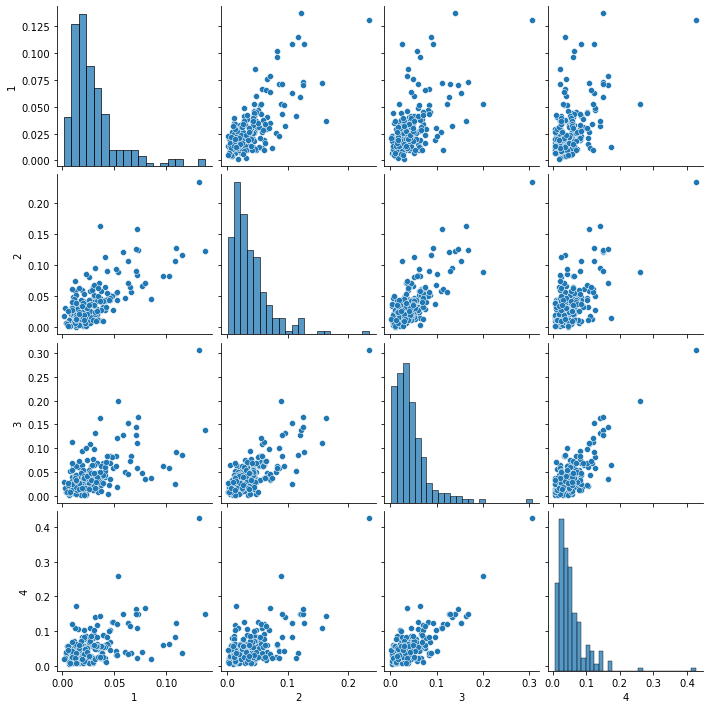

In [ ]:
#seaborn.pairplot() is a function in the Seaborn library of Python
#that creates a grid of scatterplots and histograms for a given dataset.
#It is a useful tool for visualizing the relationship between multiple variables.

import seaborn as sns
import pandas as pd
data = pd.read_csv("sonar.csv")
penguins=data.iloc[:,0:4]
sns.pairplot(penguins)

<AxesSubplot:ylabel='Count'>

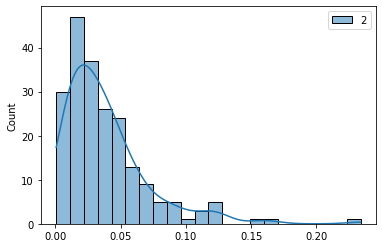

In [ ]:
#seaborn.histplot() is a function in the Seaborn library of Python that creates a histogram for a given dataset.
#It is a useful tool for visualizing the distribution of a single variable.
sns.histplot(data.iloc[:,1:2],kde=True)

(Q4) Explore some other ways to visualise the data, and apply it to your dataset. Make
sure to choose a visualisation that reveals an interesting feature or trend in the data,
and explain how your visualisation does this.
Plotly - a graphing library. Python: https://plotly.com/python/,

##### Perhaps useful websites
python learning: https://www.w3schools.com/python/default.asp
pandas: https://pandas.pydata.org/pandas-docs/stable/reference/io.html
scikit-learn:https://scikit-learn.org/stable/modules/classes.html
seaborn:https://seaborn.pydata.org/generated/seaborn.objects.Plot.html